In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT

path = '../datasets/ETTh1.csv'

start = 0
length_in = 168
length_out = 24


def show(data, start, length_in = 168, length_out = 24):


    data = data.iloc[start:start + length_in + length_out]
    plt.figure(figsize=(12, 6))
    for col in data.columns:
        if col != 'date':
            plt.plot(data['date'], data[col], label=col)
        # print("col", col)
        
    plt.axvline(x=data['date'].iloc[length_in], color='red', linestyle='--', label='divide line')

    plt.xlabel('date')
    plt.ylabel('value')
    plt.title('ETTh1 Dataset')
    plt.legend()
    plt.xticks(data['date'][::24], rotation=45)
    plt.tight_layout()
    plt.show()

data = pd.read_csv(path)
print("readed\n", data.head())

# save the figure
# plt.savefig('ETTh1_dataset.png')


# print(data.head())

readed
                   date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0  2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1  2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2  2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3  2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4  2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000


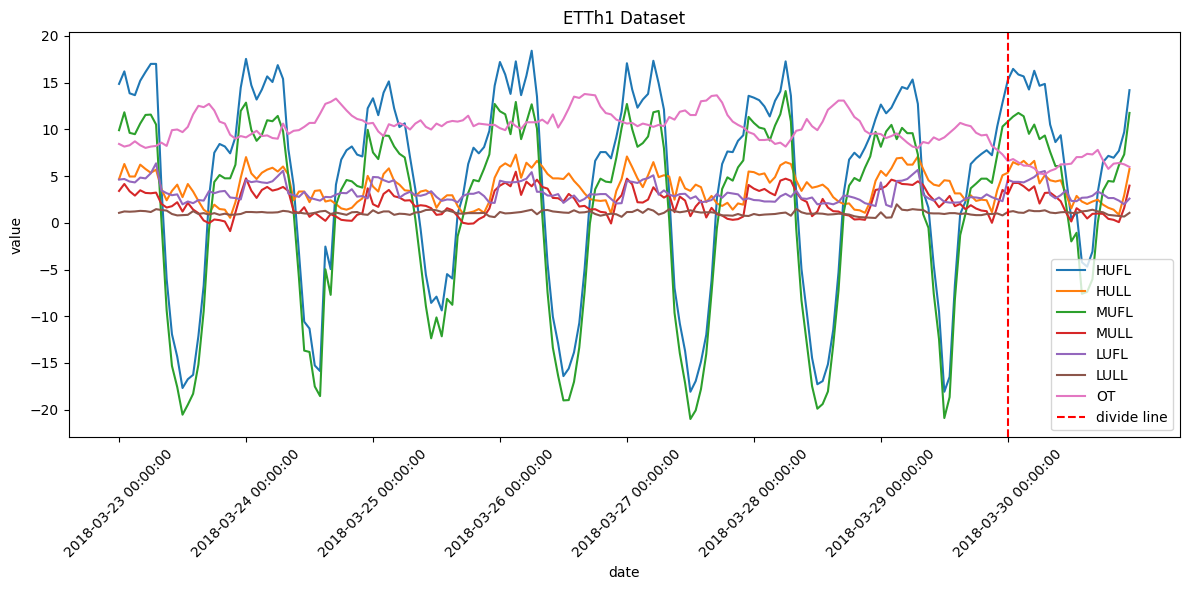

In [2]:
show(data, 168 * 90)

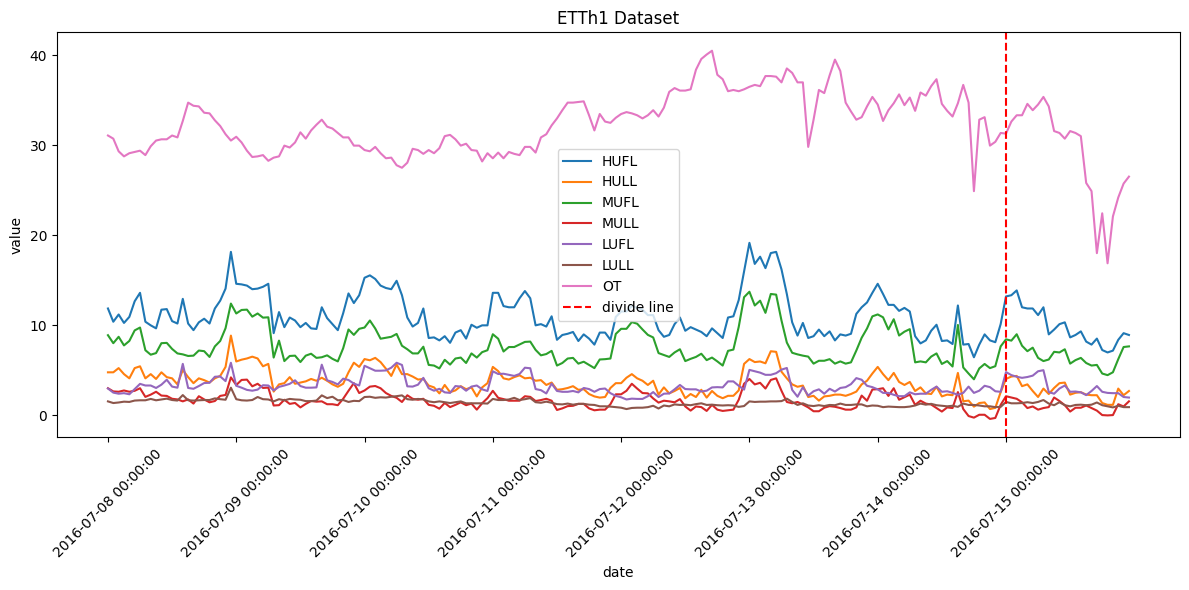

In [3]:
show(data, 168 * 1)

In [33]:

# 处理数据中的平台，对于平台做出标记
def data_preprocess(datain : pd.DataFrame) -> "tuple[pd.DataFrame, list]":
    """
    处理数据中的平台，对于平台做出标记
    :param data: 原始数据
    :return: 处理后的数据
    """
    # copy data
    data = datain.copy()
    
    # 将日期列转换为datetime类型
    data['date'] = pd.to_datetime(data['date'])
    # 将日期列设置为索引
    data.set_index('date', inplace=True)
    # 将数据按日期升序排列
    data.sort_index(inplace=True)
    
    # 添加平台标记
    data['platform'] = 0

    ABNORMAL_LEN = 4

    for row in ['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'OT']: # LULL 本来就很平，不管了
        i, j = 0, 0
        while i < len(data):
            j = i
            while j < len(data) and data[row].iloc[j] == data[row].iloc[i]:
                j += 1
            if j - i > ABNORMAL_LEN:
                data['platform'].iloc[i:j] = 1
            i = j

    platform_pair = list()

    i, j = 0, 0
    while i < len(data):
        j = i
        while j < len(data) and data['platform'].iloc[j] == data['platform'].iloc[i]:
            j += 1
        if data['platform'].iloc[i] == 1:
            platform_pair.append((i, j))
        i = j

    return data, platform_pair

In [34]:
p_data, p_tag = data_preprocess(data)
print("preprocess data\n", p_data.head())

c:\Users\ASUS\anaconda3\envs\crossformer\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


preprocess data
                       HUFL   HULL   MUFL   MULL   LUFL   LULL         OT  \
date                                                                       
2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000   
2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001   
2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001   
2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001   
2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000   

                     platform  
date                           
2016-07-01 00:00:00         0  
2016-07-01 01:00:00         0  
2016-07-01 02:00:00         0  
2016-07-01 03:00:00         0  
2016-07-01 04:00:00         0  


In [36]:
def show_fig(data, start, end, gap = 24):

    gap_left = min(gap, start)
    gap_right = min(gap, len(data) - end)
    data = data.iloc[start - gap_left : end + gap_right]
    plt.figure(figsize=(12, 6))
    for col in data.columns:
        if col not in ['date', 'platform']:
            plt.plot(data['date'], data[col], label=col)

    plt.axvline(x=data['date'].iloc[gap_left], color='red', linestyle='--', label='divide line')
    plt.axvline(x=data['date'].iloc[len(data) - gap_right - 1], color='red', linestyle='--', label='divide line')

    plt.xlabel('date')
    plt.ylabel('value')
    plt.title(f'ETTh1 Dataset from {data["date"].iloc[gap_left]} to {data["date"].iloc[len(data) - gap_right - 1]}')
    plt.legend()
    plt.xticks(data['date'][::12], rotation=45)
    plt.tight_layout()
    plt.show()

platform pair (720, 745)


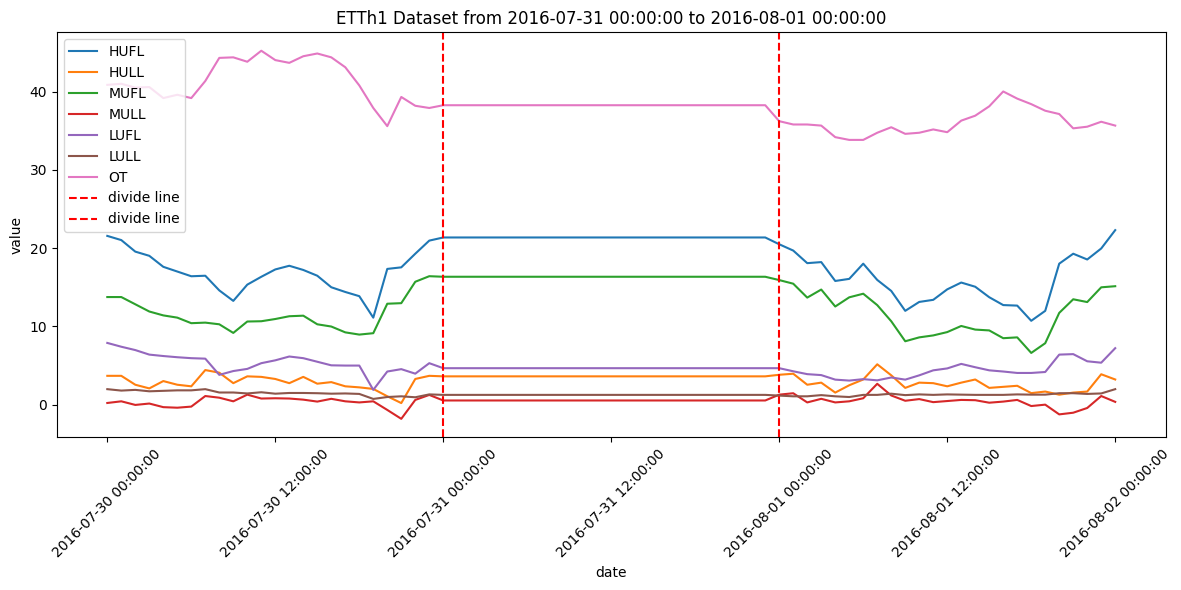

platform pair (803, 808)


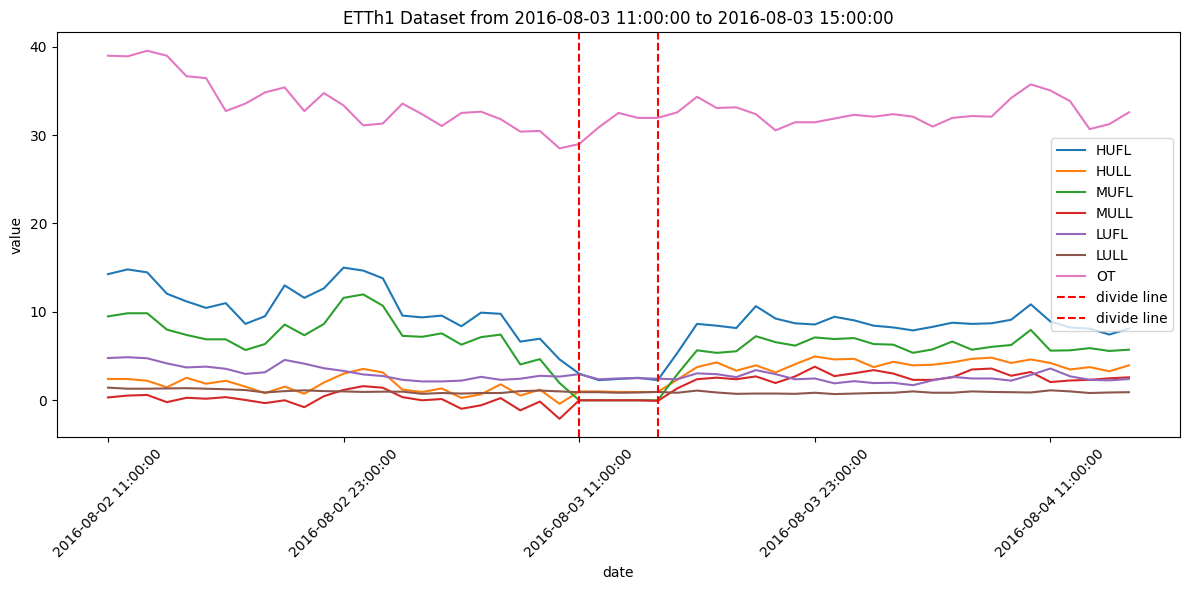

platform pair (1464, 1488)


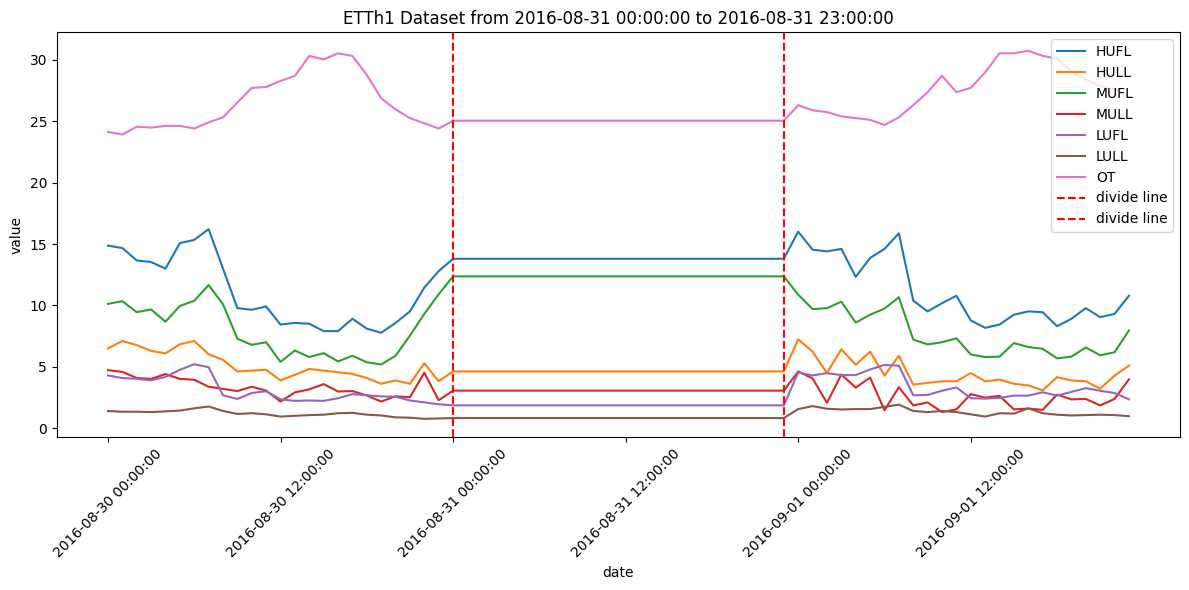

platform pair (2928, 2952)


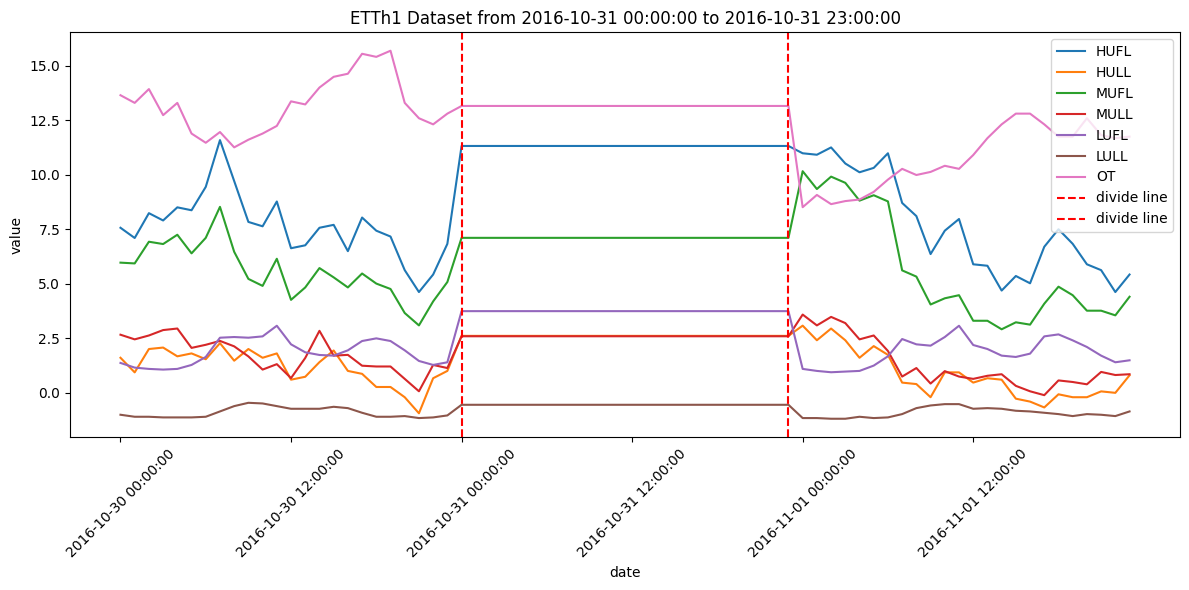

platform pair (3775, 3848)


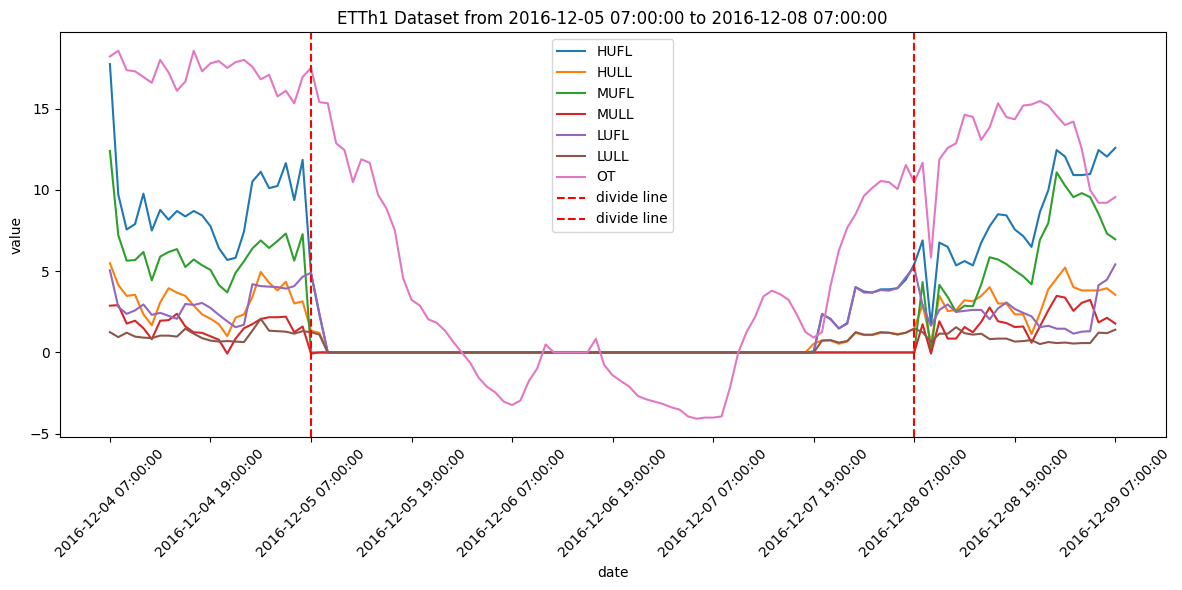

platform pair (4392, 4416)


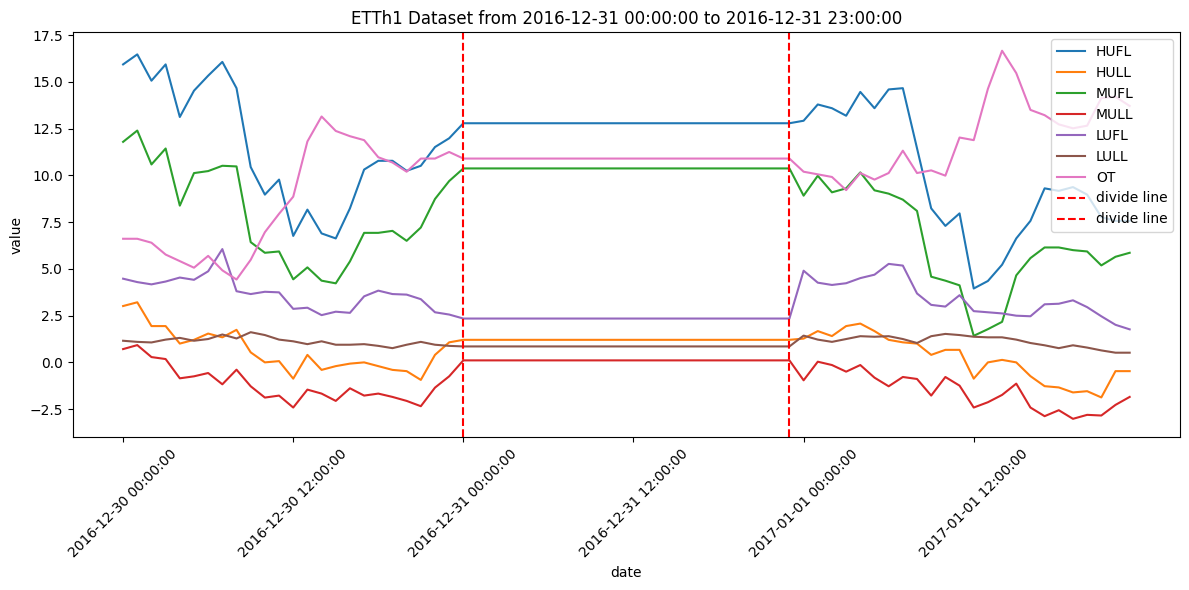

platform pair (4625, 4630)


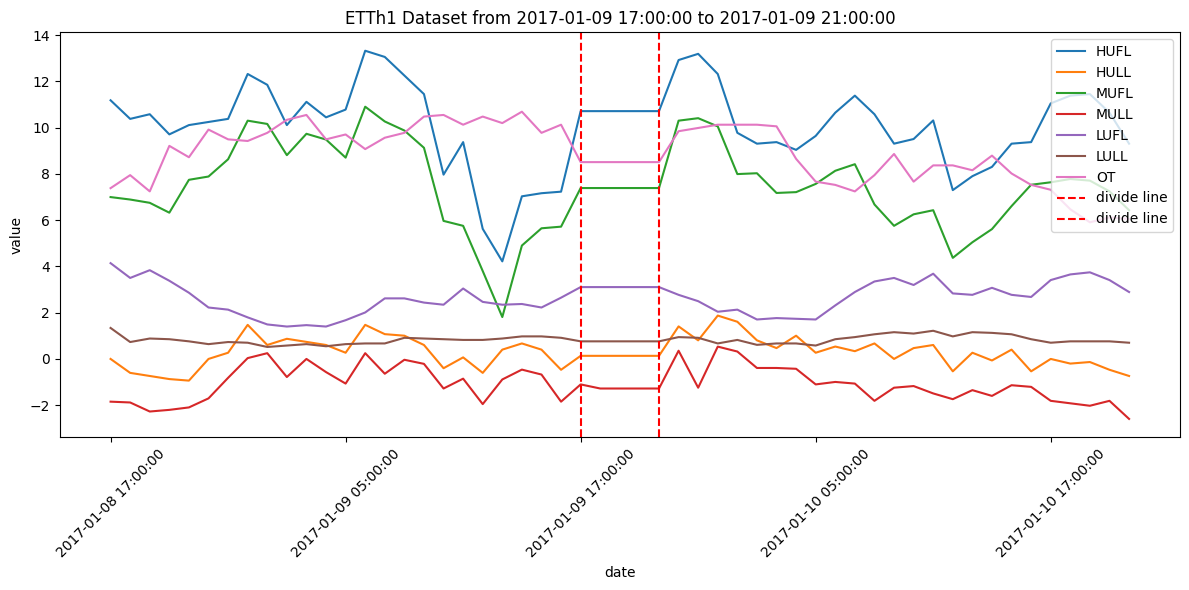

platform pair (5042, 5047)


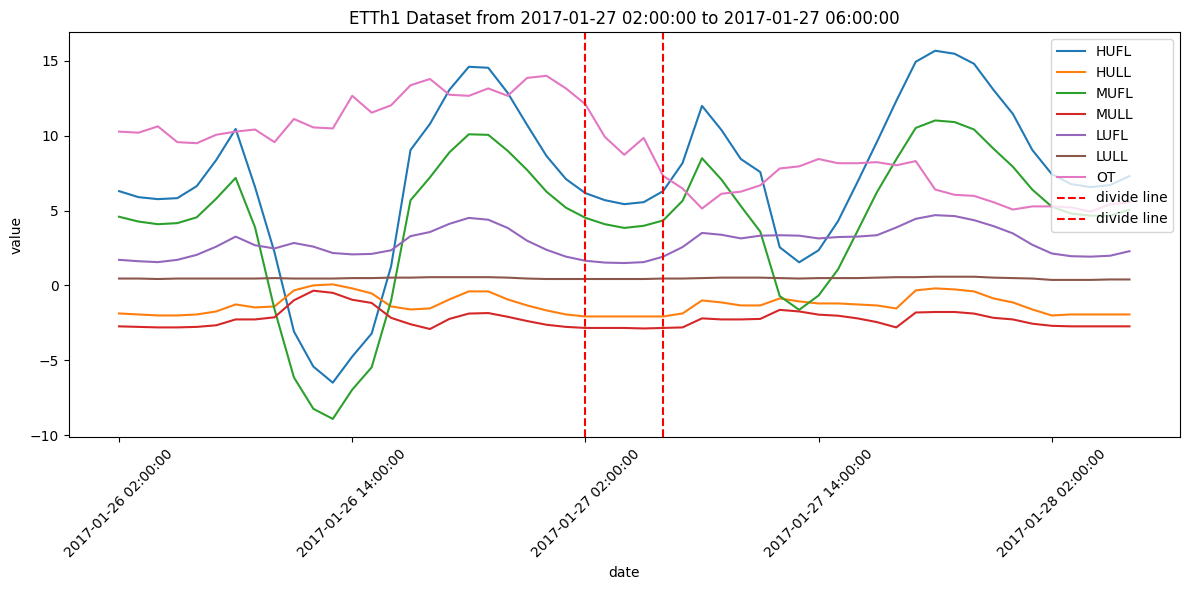

platform pair (5067, 5072)


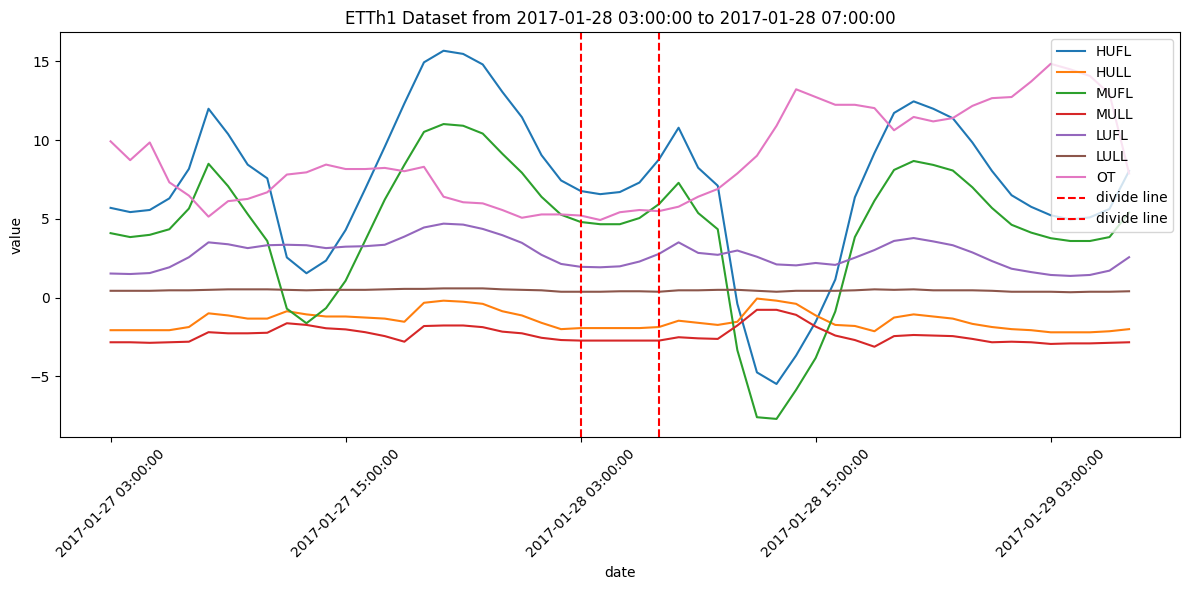

platform pair (5136, 5160)


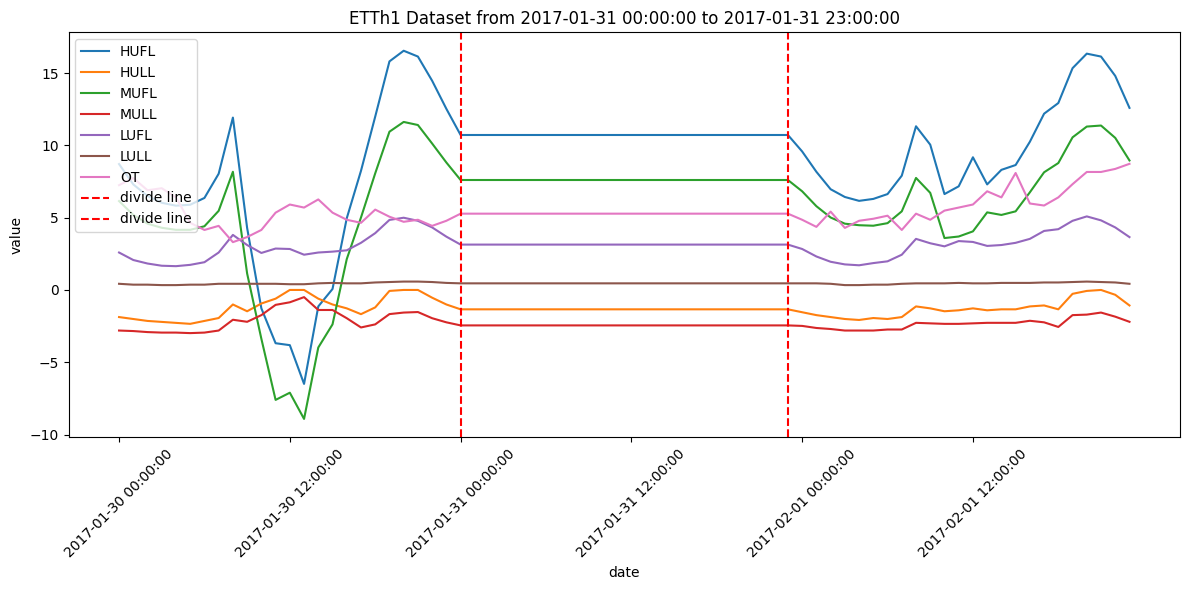

platform pair (6552, 6576)


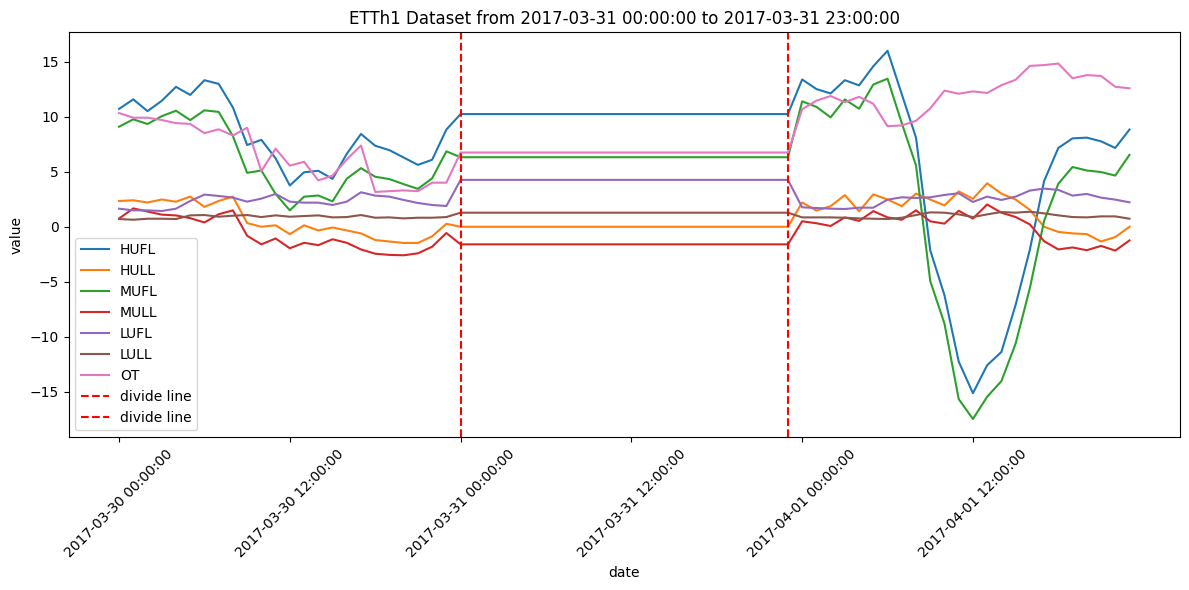

platform pair (7848, 7854)


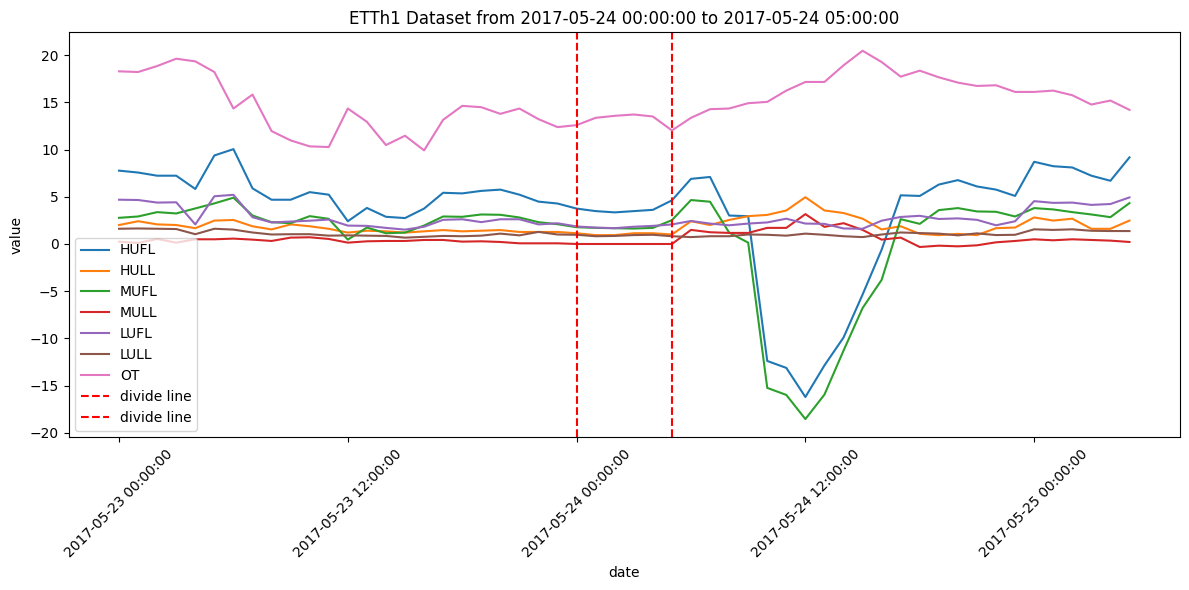

platform pair (8016, 8041)


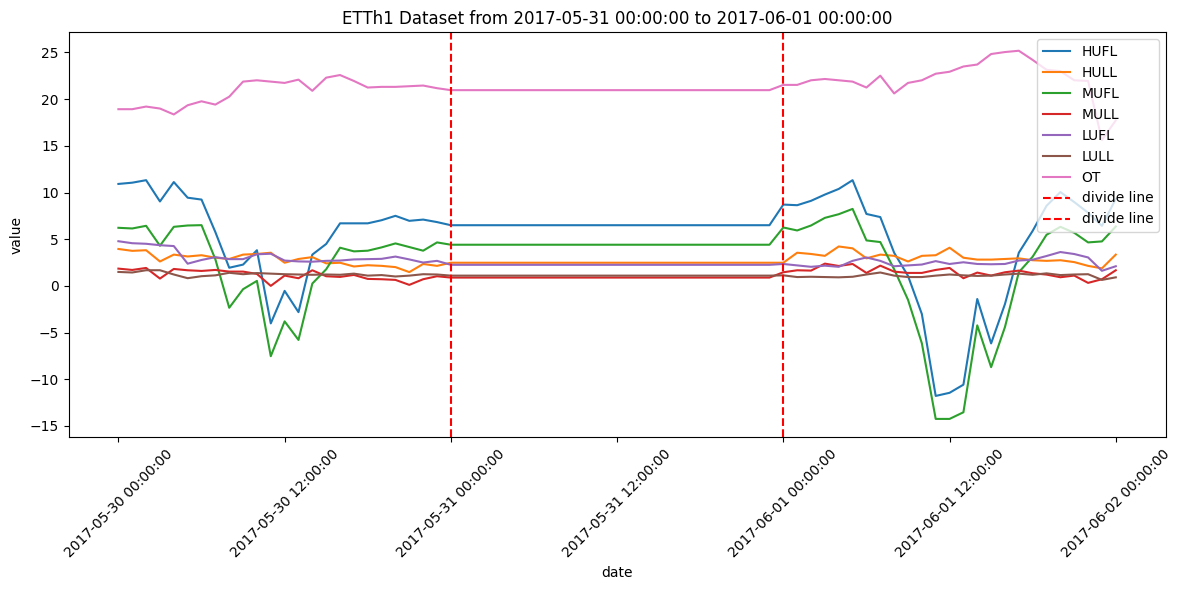

platform pair (9309, 9450)


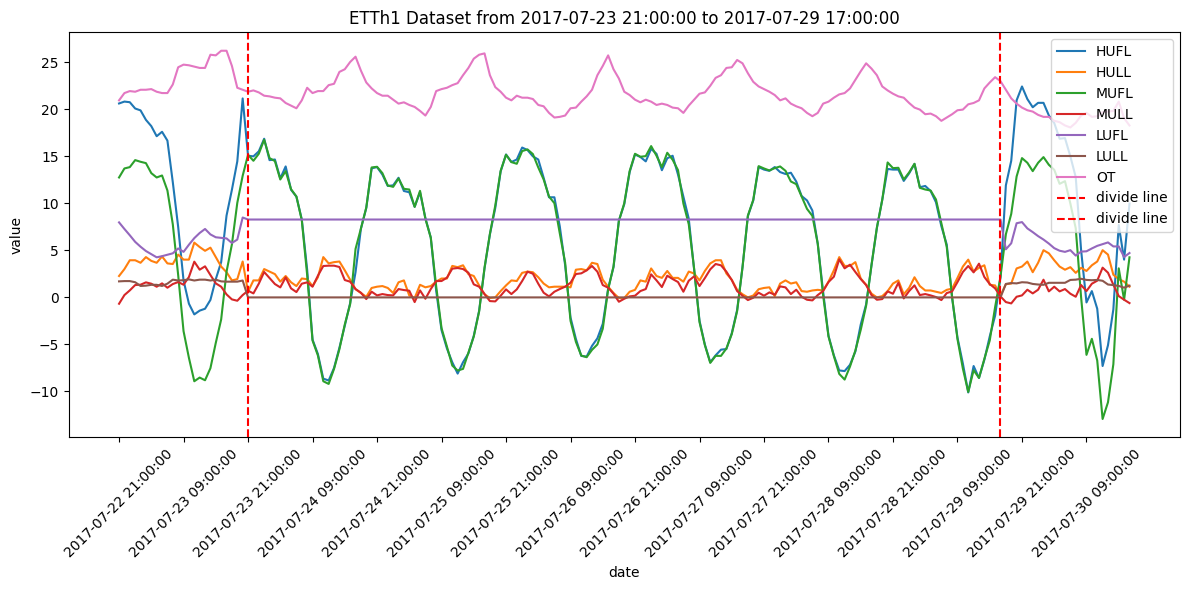

platform pair (9480, 9504)


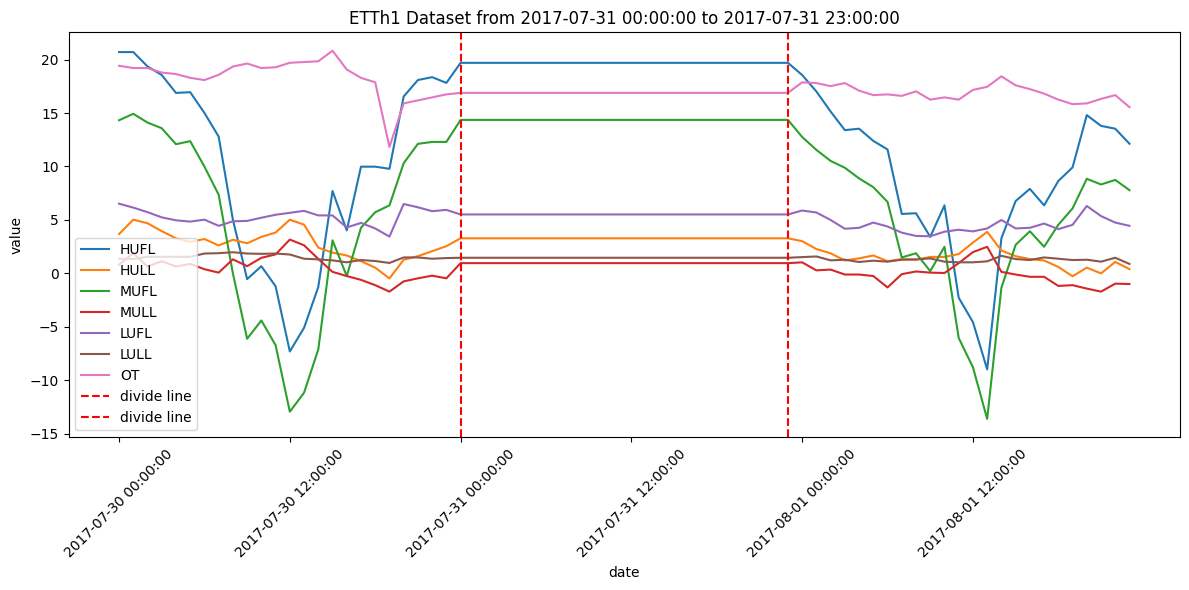

platform pair (10224, 10248)


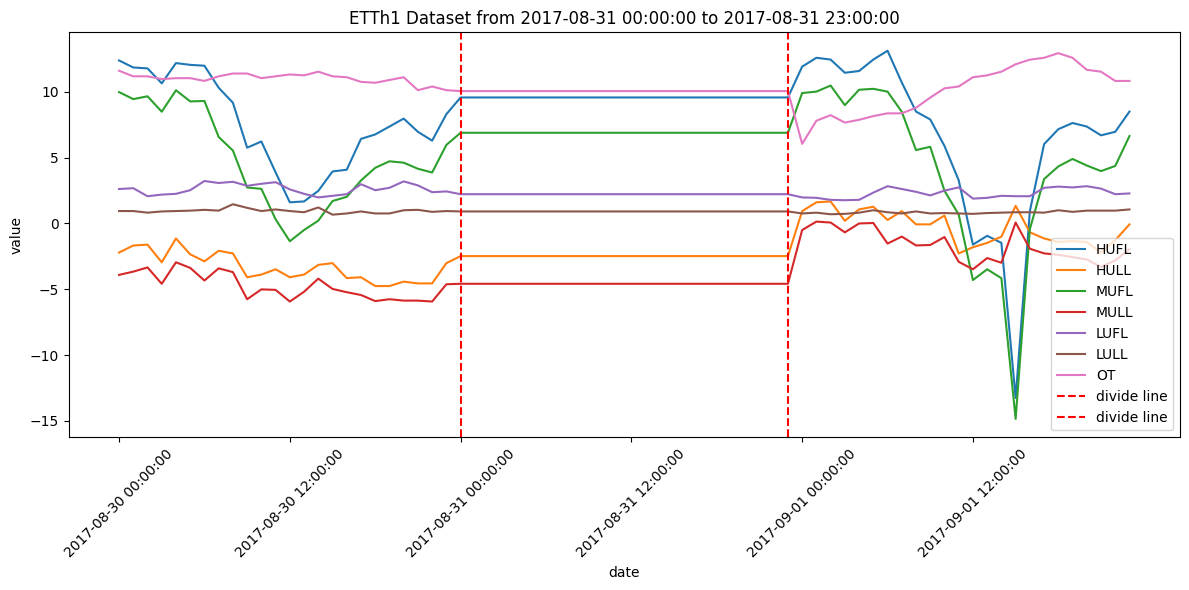

platform pair (10914, 10927)


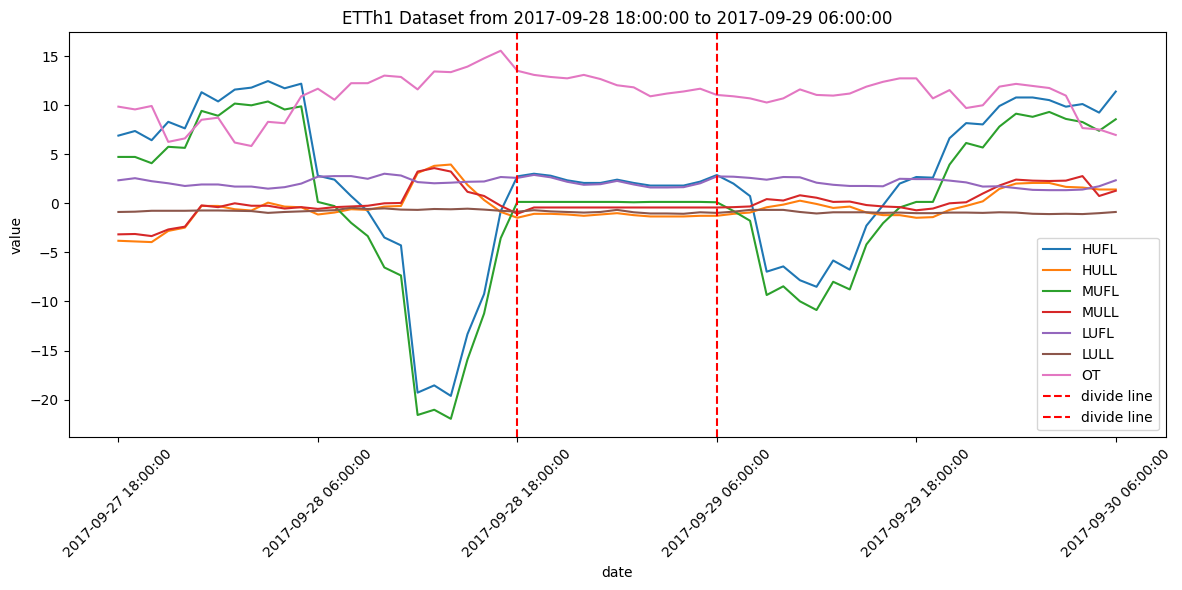

platform pair (11687, 11712)


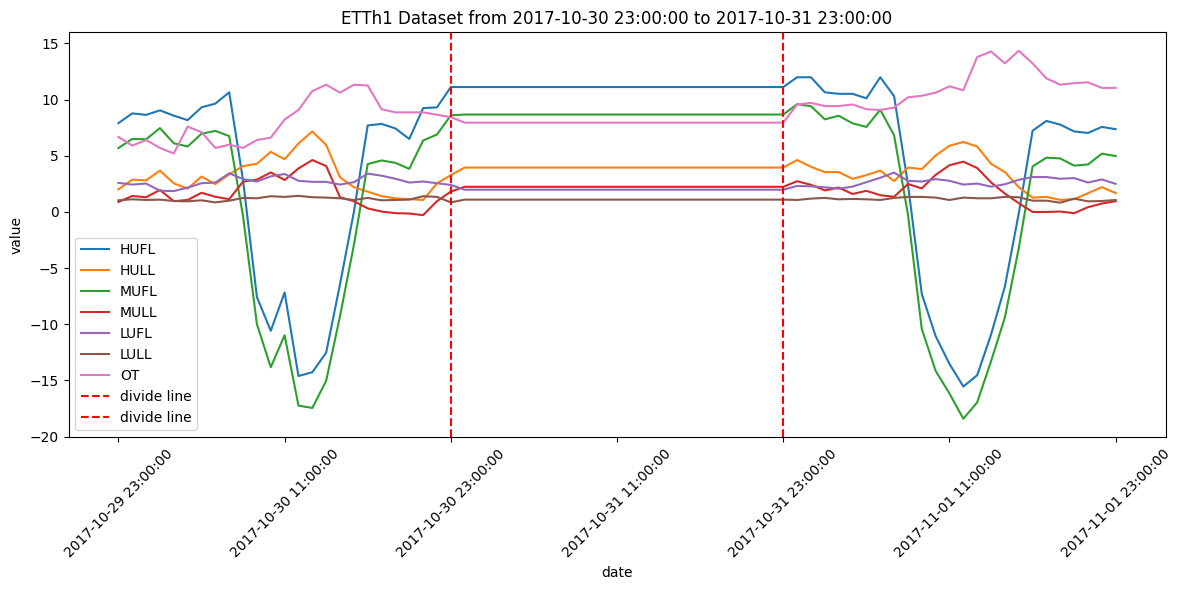

platform pair (13152, 13177)


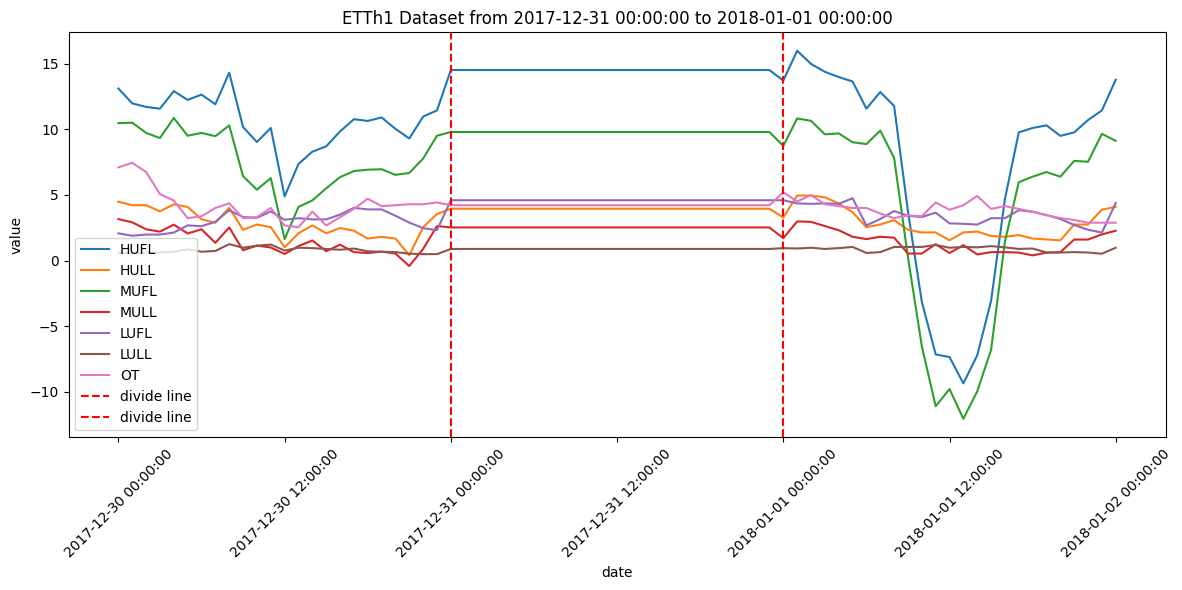

platform pair (13272, 13281)


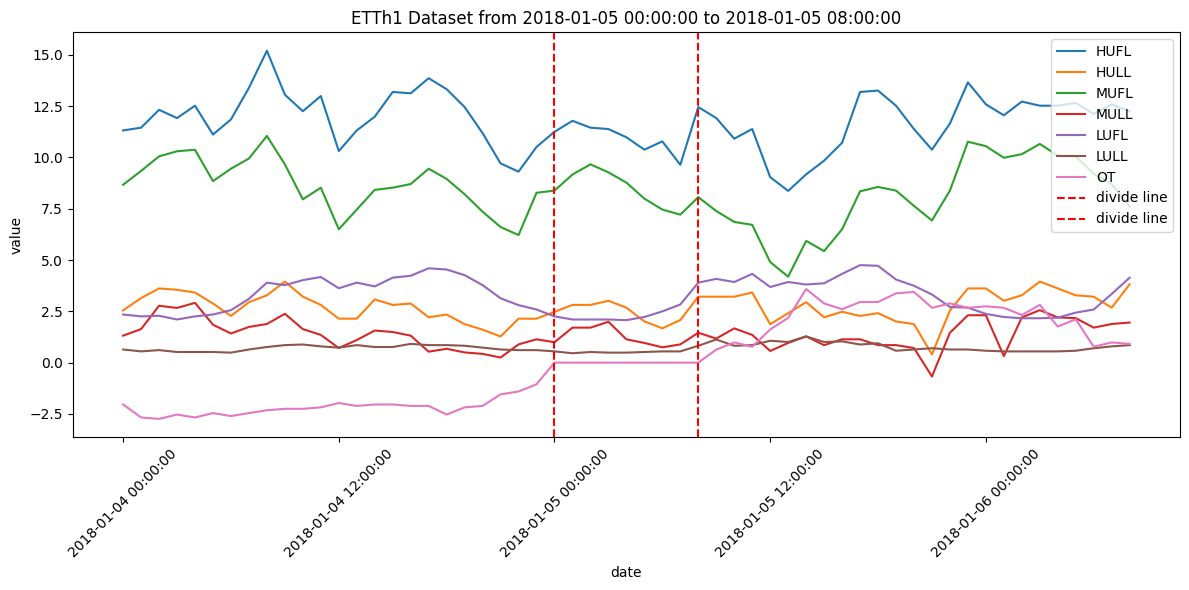

platform pair (13330, 13336)


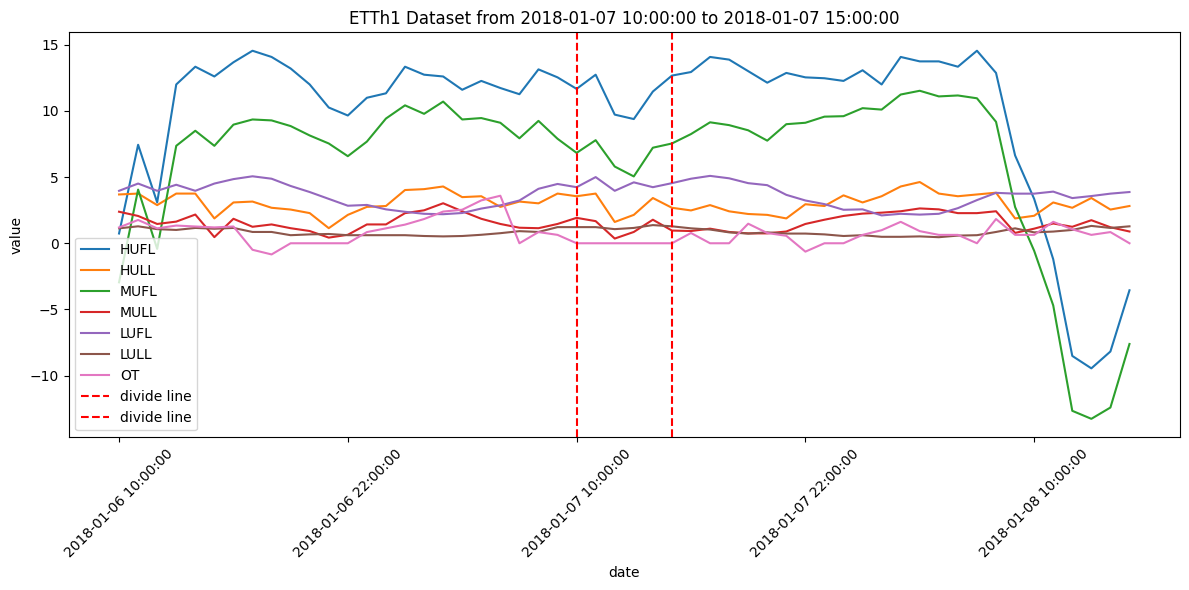

platform pair (13736, 13743)


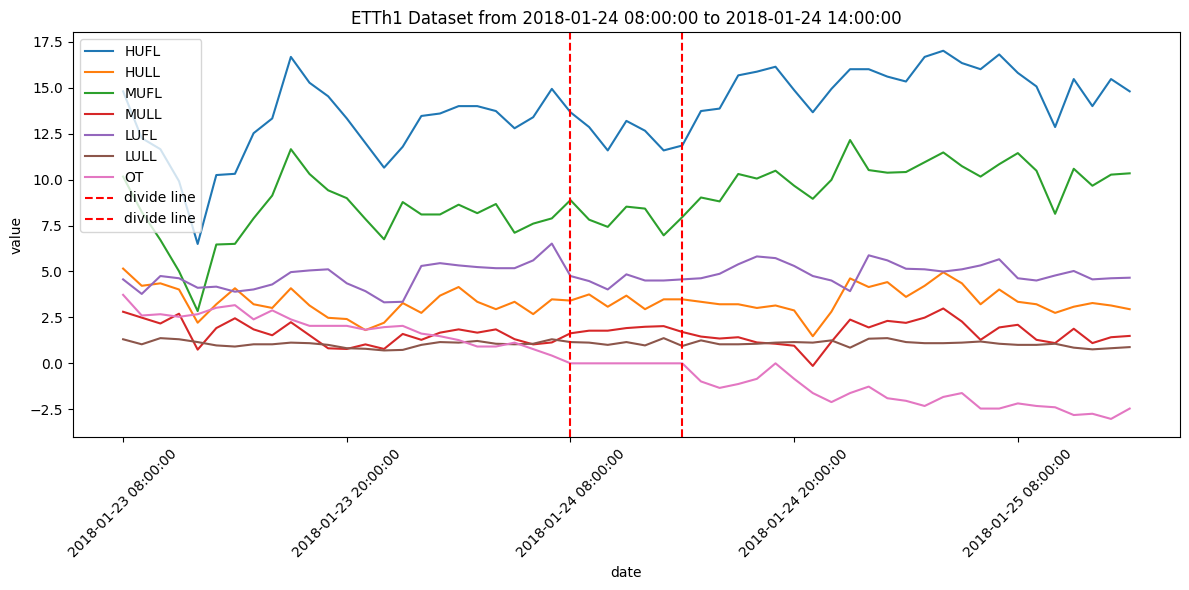

platform pair (13789, 13795)


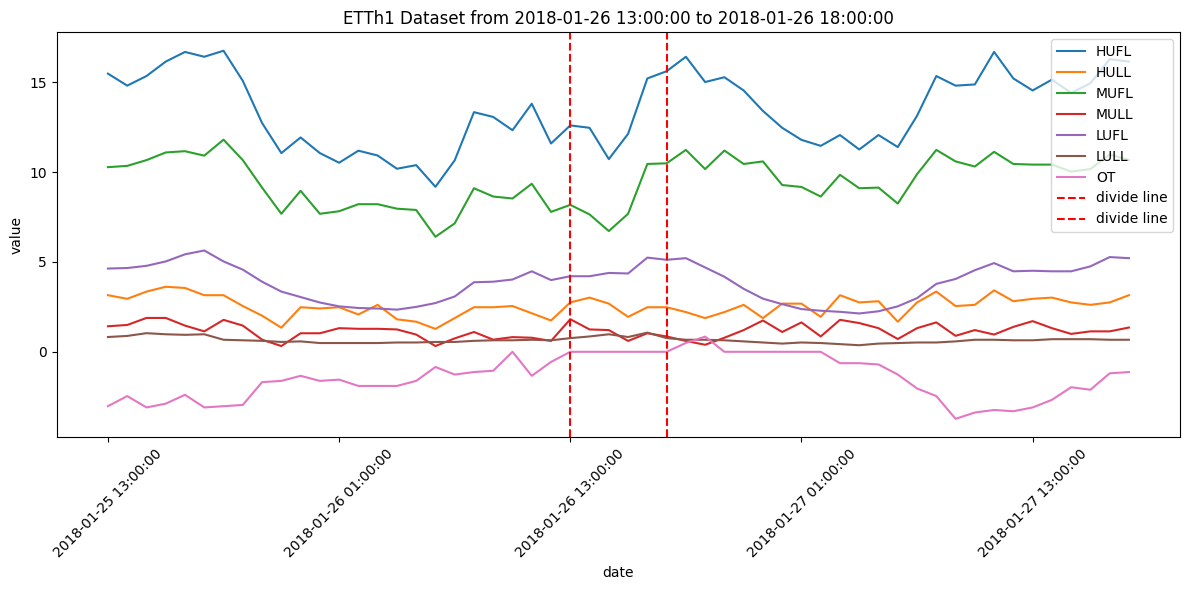

platform pair (13797, 13803)


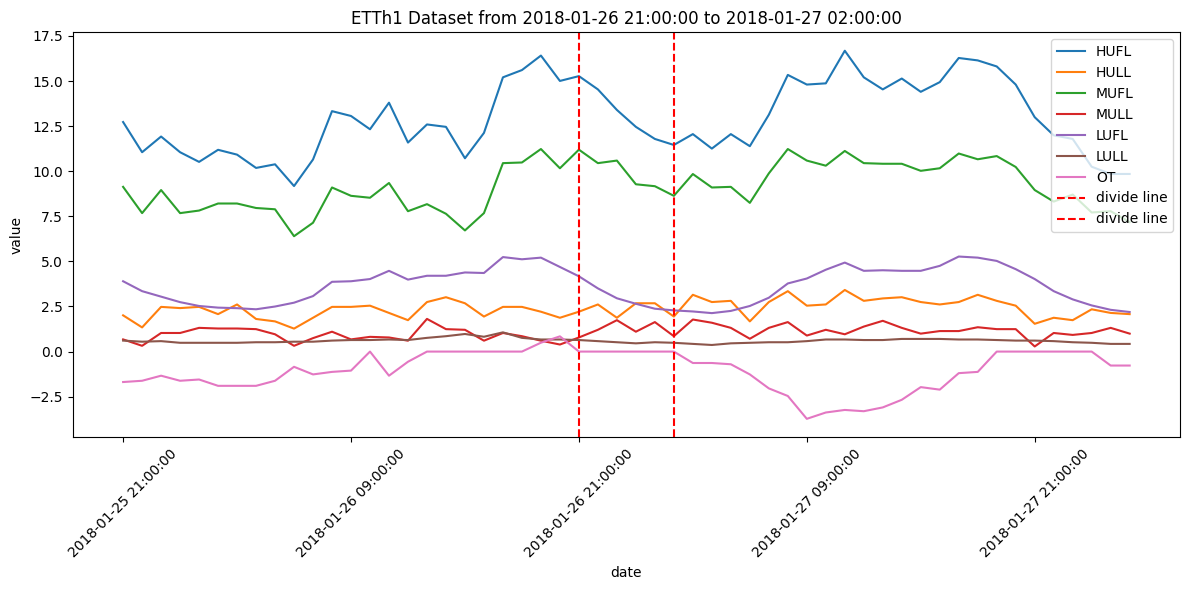

platform pair (13819, 13825)


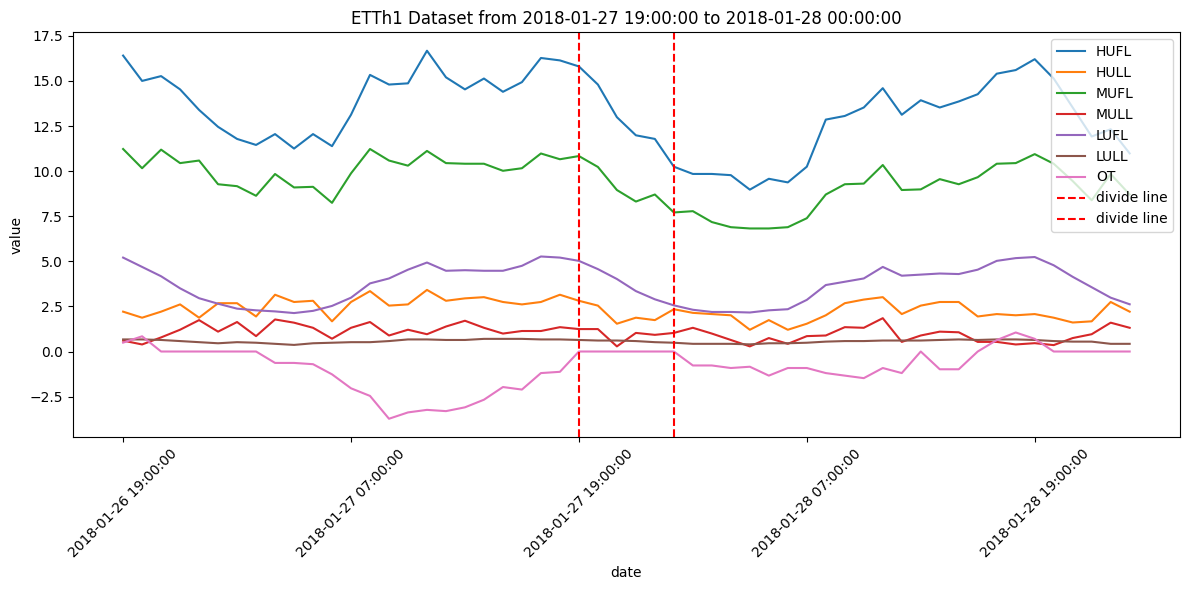

platform pair (13844, 13849)


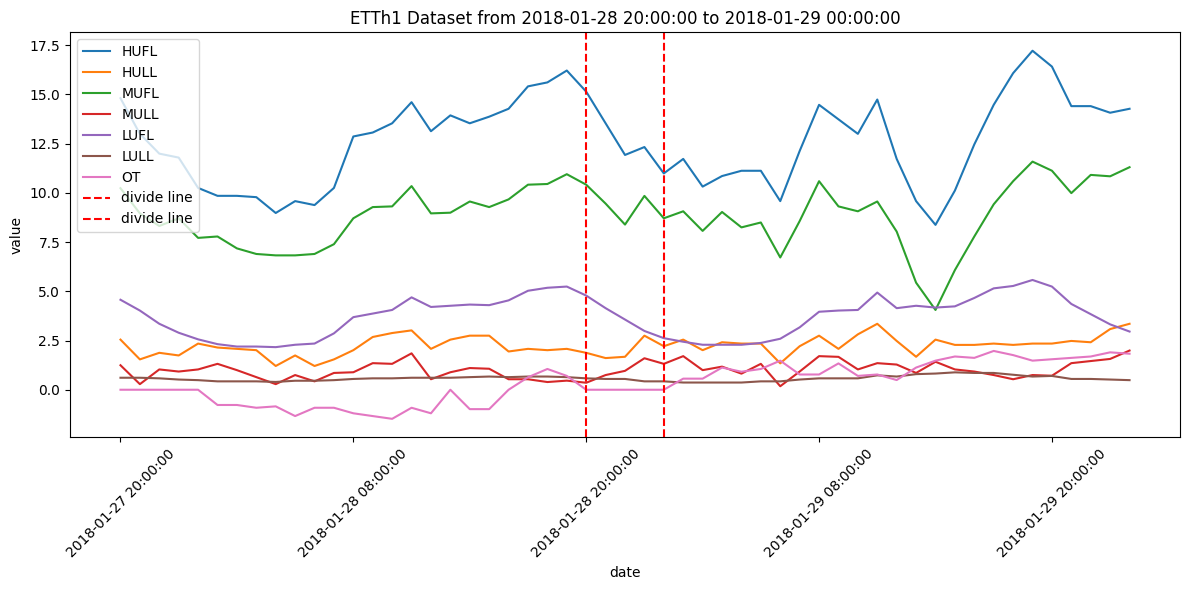

platform pair (13896, 13920)


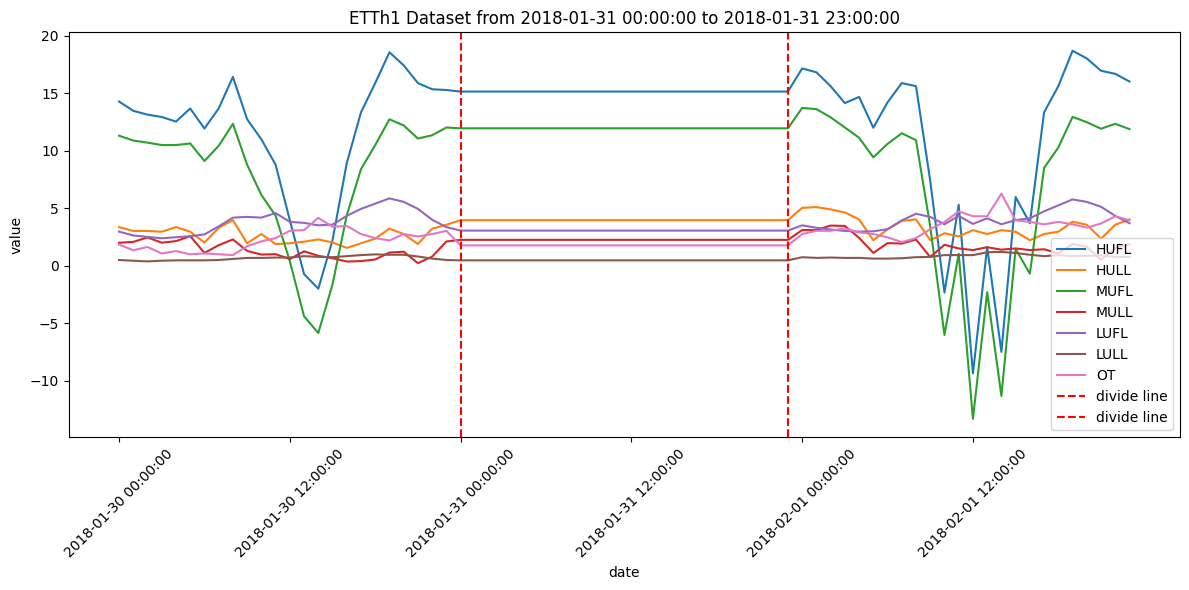

platform pair (14392, 14397)


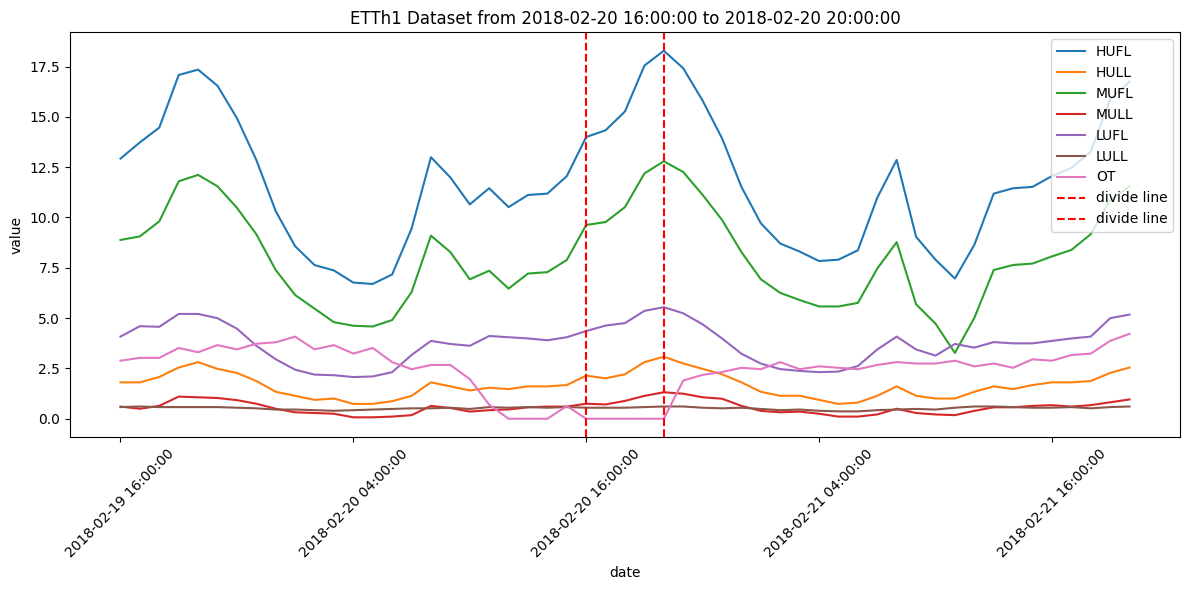

platform pair (15312, 15336)


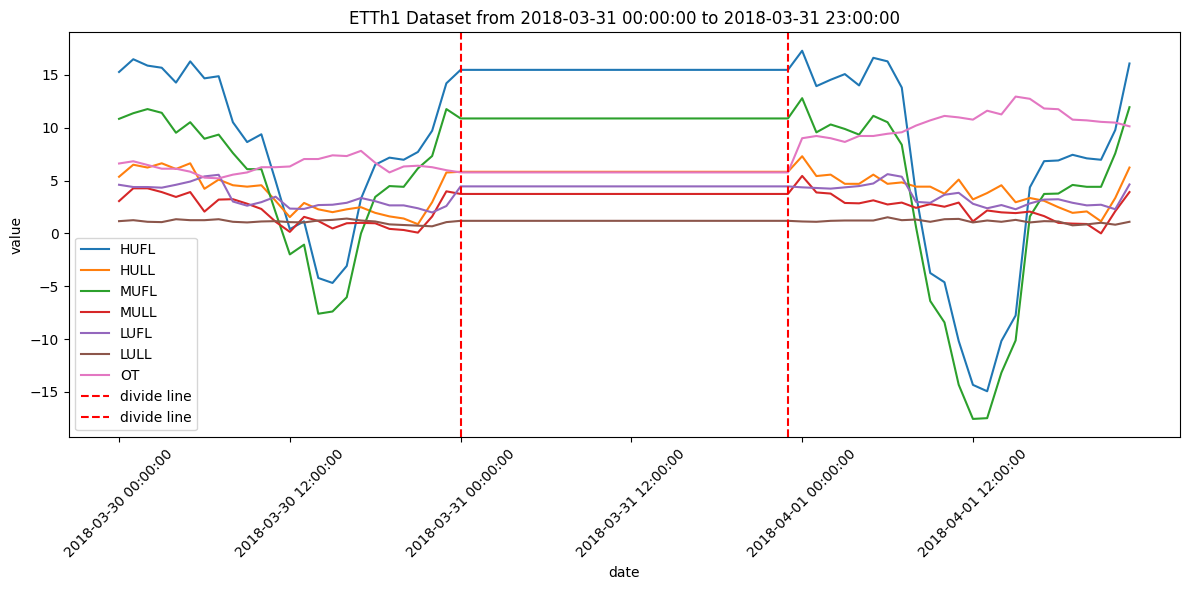

platform pair (16247, 16254)


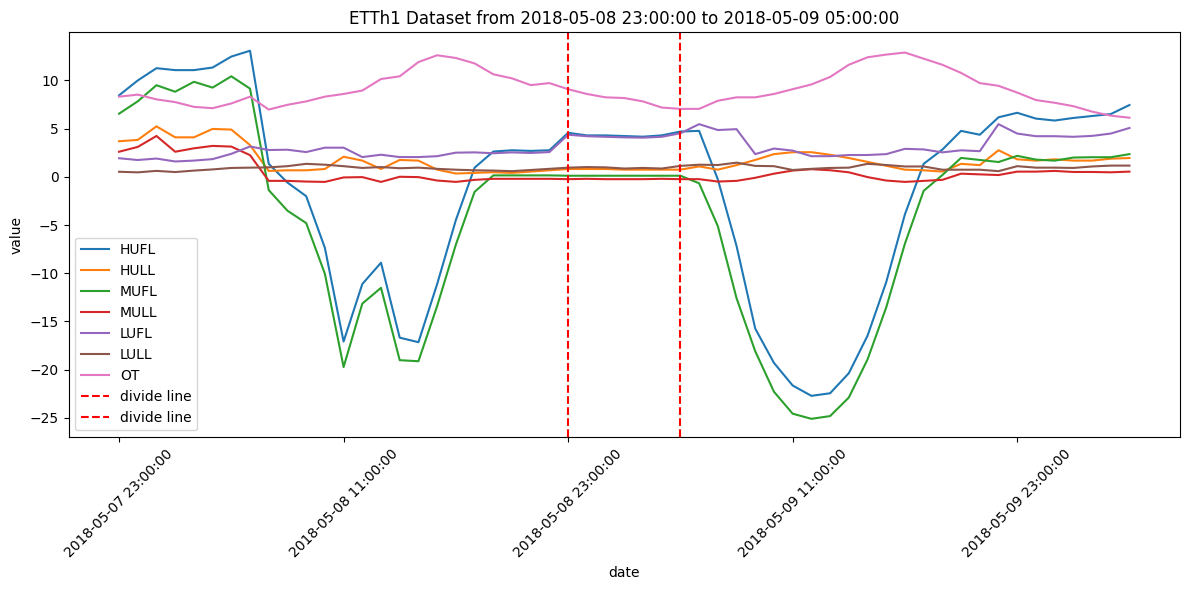

platform pair (16776, 16800)


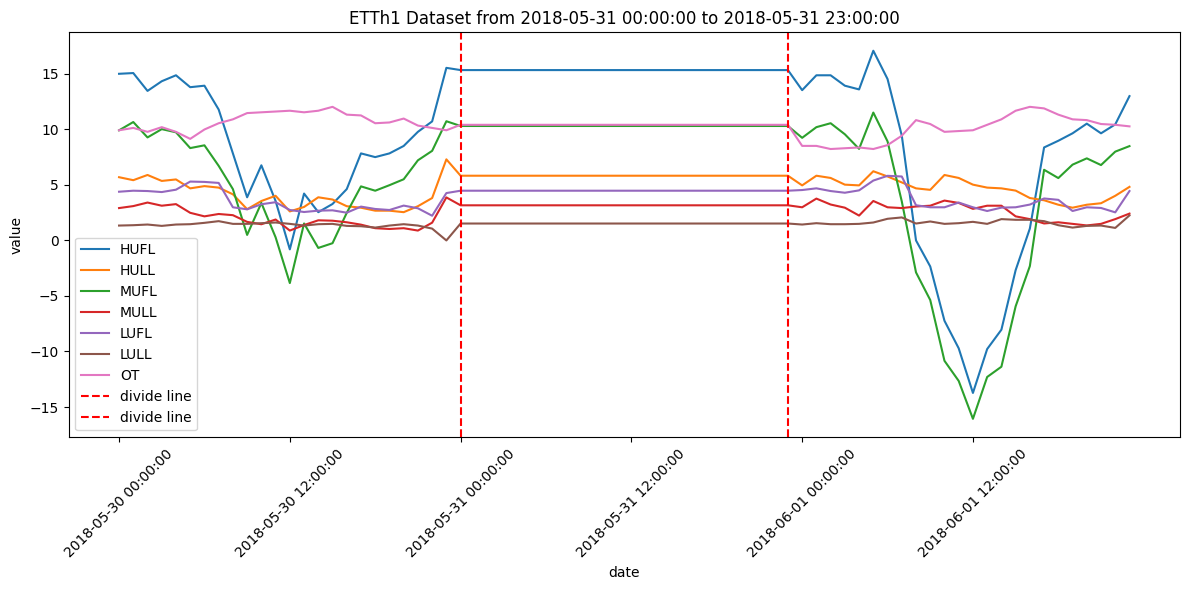

In [37]:
# show_fig(data, 1, 11)
count_platform = 0
total_platform_time = 0
for pair in p_tag:
    start, end = pair
    count_platform += 1
    total_platform_time += end - start
    print("platform pair", pair)
    show_fig(data, start, end)


In [39]:
# save p_data to csv

p_data.to_csv('../datasets/ETTh1_preprocess.csv', index=True)